# Esercizio 9: salesman problem, Algoritmo genetico

Gli algoritmi genetici sono una delle tecniche usate per risolvere problemi di massimizzazione o minimizzazione.
In questo esercizio sviluppo un algoritmo genetico per risolvere il Salesman problem: trovare il percorso più breve possibile per collegare tra di loro una serie di punti (città)

Fissati i punti, l'algoritmo genera una popolazione, inizialmente casuale, di possibili ordini, i quali ad ogni nuova generazione mutano con una probabilità $p_m$ e scambiano tra loro con una probabilità $p_c$ il loro materiale genetico (la disposizione delle città). 

Lo scambio di materiale genetico avviene tra coppie scelte preferendo gli individui migliori, cioè quelli minimizzano la fitness function $L$:

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

la quale non è altro che la lunghezza totale del percorso che collega le città nell'ordine in cui sono disposte. In questo modo verranno scelti con maggior probabilità gli individui migliori, che cederanno il loro materiale genetico alle generazioni successive.

Le mutazioni implementate sono le seguenti:
- Scambia tra due posizioni $i,j$: $[x_1,...,x_i,..x_j,...,x_N]\rightarrow [x_1,...,x_j,..x_i,...,x_N] $
- Trasla tutte le posizioni (esclusa la prima) di n posti
- Inverte l'ordine di comparsa di n posizioni: $[x_1,...,x_i,x_{i+1},x_{i+2},...,x_N]\rightarrow [x_1,...,x_{i+2},x_{i+1},x_{i},...,x_N] $
- Scambia $m<\frac{N}{4}$ posizioni nella prima metà con $m$ posizioni nella seconda metà. Le posizioni vengono scelte in modo tale da non poter superare rispettivamente la prima o la seconda metà


Uso l'algoritmo genetico sviluppato per risolvere il problema del travel salesman con $32$ città distribuite casualmente su una circonerenza e all'interno di un quadrato.
Per farlo uso $p_m=9.7\%$, $p_c=66\%$, una popolazione di $N_{indiv}=400$ individui per un totale di $N_{gen}=700$ generazioni 

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D

# Quadrato

In una prima fase valuto per quali valori di $p_m$ e $p_c$ si ottiene il miglior percorso 
valutando la fitness finale con $p_m \in [0.07, 0.1]$ con step $\delta=0.003$ e  $p_c \in [0.5, 0.7]$ con step $\delta=0.02$

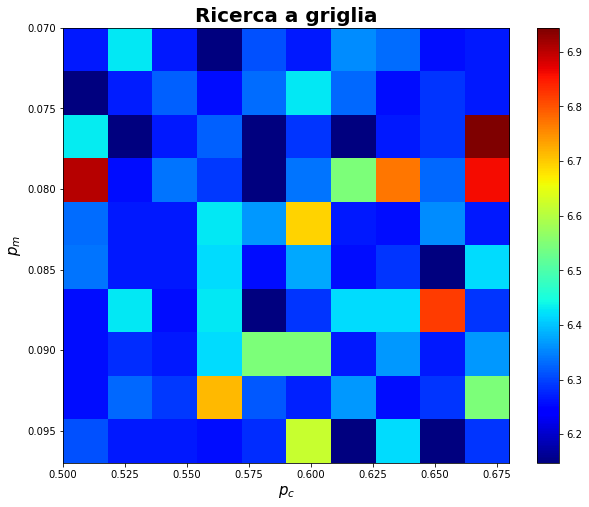

In [130]:
file=open('L_square_grid.dat')
pm, pc, L=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)
#print(sigma1)

imax=[]
l_appo=np.min(L)
i_appo=np.argmin(L)

for i in range(len(L)):
    #print(L[i])
    if(L[i] ==l_appo):
        #print(L[i])
        imax.append(i)

    
Lgrid=np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        Lgrid[i][j]=L[i*10+j]
        

MAX1=np.max(Lgrid)
MIN1=np.min(Lgrid)
#print(Lgrid)

extent=  np.min(pc),np.max(pc),np.max(pm),np.min(pm)

plt.figure(figsize=(10,8))
plt.imshow(Lgrid,extent=extent,vmin=MIN1, vmax=MAX1, cmap='jet', aspect='auto')
plt.title('Ricerca a griglia', fontsize=20, fontweight='bold')
plt.colorbar()
plt.ylabel(r'$p_m$', fontsize=15)
plt.xlabel(r'$p_c$', fontsize=15)
plt.show()

Si osserva ò'andamento al variare dei paramentri pare essere molto casuale. I valori minimi per $L$ si ottengono per $p_m=9.7\%$, $p_c=66\%$

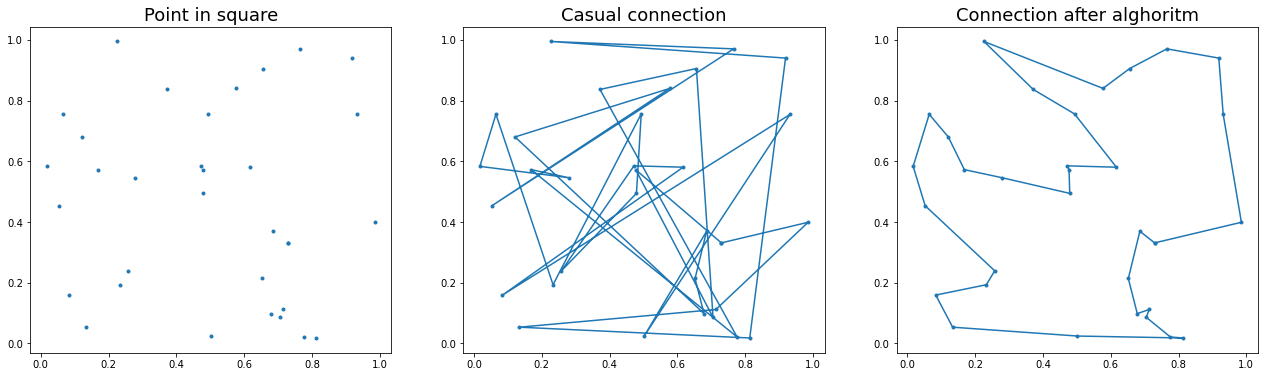

In [131]:
file=open('square_pos.dat')
x,y=np.loadtxt(file, delimiter=",", usecols=[0,1], unpack=True)

file=open('order_square.dat')
order=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")

fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(22,6))
ax[0].plot(x,y, '.')
ax[0].set_title("Point in square", fontsize=18)
ax[1].plot(x,y, '.-')
ax[1].set_title("Casual connection",fontsize=18)
ax[2].plot(x[order-1],y[order-1], '.-')
ax[2].set_title("Connection after alghoritm",fontsize=18)
plt.show()

L'algoritmo riesce a collegare bene le città senza creare intersezioni nel percorso.

### Fitness function

Mostro di seguito i grafici della fitness function del miglior individuo $L_{best}$ e della media dei primi $N/2$ individui per ogni generazione $L_{mean}=\frac{1}{N/2}\sum_{1=0}^{N/2} L_i$


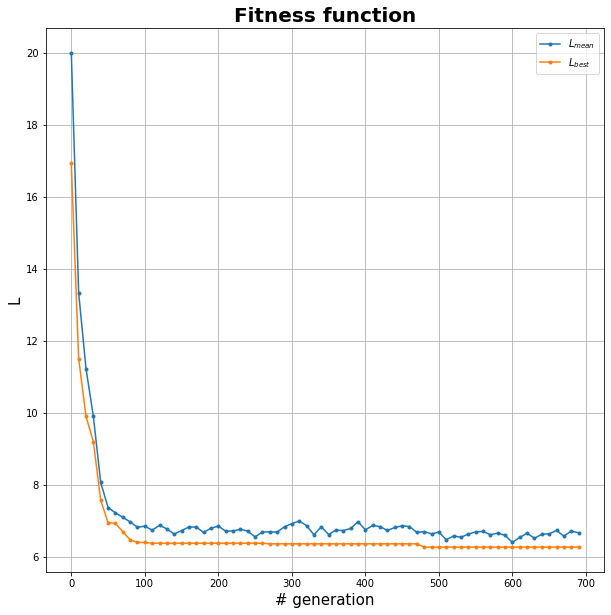

loss finale= 6.2668


In [129]:
file=open('L_square.dat')
gen,best_L, ave_L=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

plt.figure(figsize=(10,10))
plt.plot(gen, ave_L, '.-', label=r'$ L_{mean}$')
plt.plot(gen, best_L, '.-', label=r'$L_{best}$')
plt.title("Fitness function", fontsize=20, fontweight='bold')
plt.xlabel("# generation", fontsize=15)
plt.ylabel("L", fontsize=15)
plt.legend()
plt.grid(True)
#plt.ylim(6,7)
plt.show()

print('loss finale=', best_L[len(best_L)-1])

L'andamento di $L_{best}$ risulta essere abbastanza continuo, mentre l'andamento di $L_{mean}$ risulta essere più discontinuo e maggiore di $L_{best}$. Ciò è dovuto, giustamente, al fatto che gli individui mutano e significa che la popolazione non ha perso variabilità genetica e non si è ridotta ad una copia dell'individuo migliore, cosa che invece succede se si riduce di molto la probabilità di mutare.

# Circonferenza

Si procede allo stesso modo anche per il caso della circonferenza

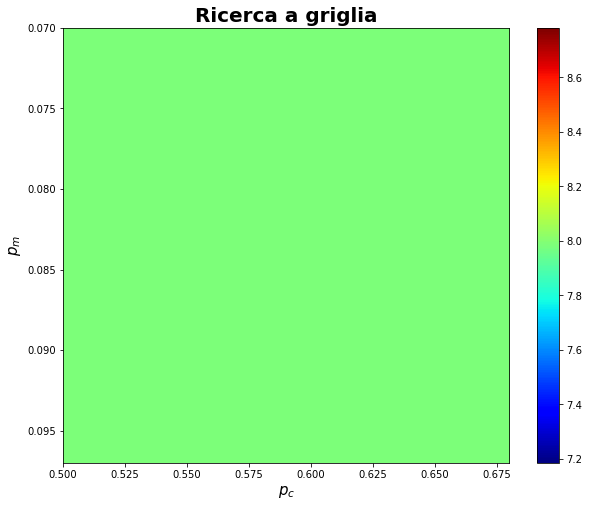

In [114]:
file=open('L_circle_grid.dat')
pm, pc, L=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)
#print(sigma1)

Lgrid=np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        Lgrid[i][j]=L[i*10+j]
        

MAX1=np.max(Lgrid)
MIN1=np.min(Lgrid)

#print(Lgrid)

extent=  np.min(pc),np.max(pc),np.max(pm),np.min(pm)

plt.figure(figsize=(10,8))
plt.imshow(Lgrid,extent=extent,vmin=MIN1, vmax=MAX1, cmap='jet', aspect='auto')
plt.title('Ricerca a griglia', fontsize=20, fontweight='bold')
plt.colorbar()
plt.ylabel(r'$p_m$', fontsize=15)
plt.xlabel(r'$p_c$', fontsize=15)
plt.show()

Essendo il caso della circonferenza più semplice, si ha che in questo intervallo di paramentri l'algoritmo converge sempre al valore ottimale.

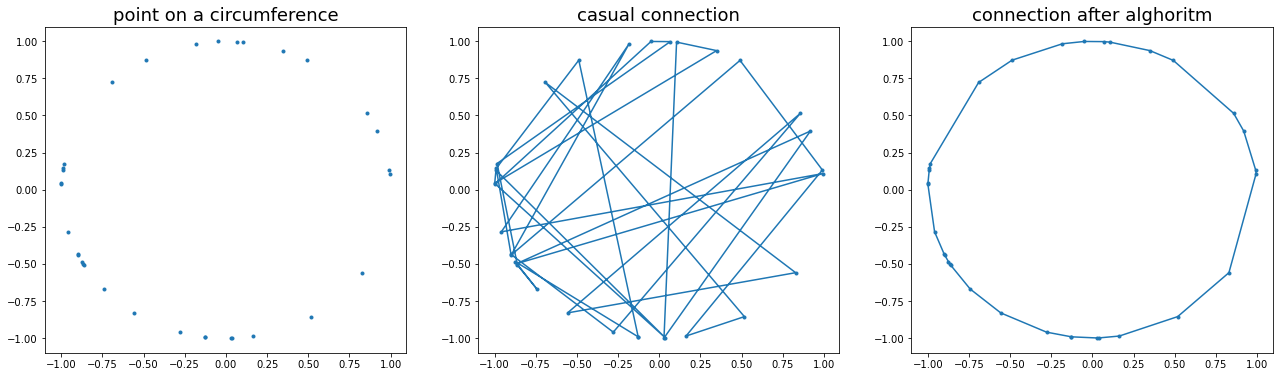

In [132]:
file=open('circle_pos.dat')
xc,yc=np.loadtxt(file, delimiter=",", usecols=[0,1], unpack=True)

file=open('order_circle.dat')
orderc=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")


fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(22,6))
ax[0].plot(xc,yc, '.')
ax[0].set_title("point on a circumference",fontsize=18)
ax[1].plot(xc,yc, '.-')
ax[1].set_title("casual connection", fontsize=18)
ax[2].plot(xc[orderc-1],yc[orderc-1], '.-')
ax[2].set_title("connection after alghoritm", fontsize=18)
plt.show()

L'algoritmo riesce a collegare nel modo migliore i punti sulla circonferenza

### Fitness function

Grafici della loss function del meglior individuo e media delle loss function della prima metà di individui

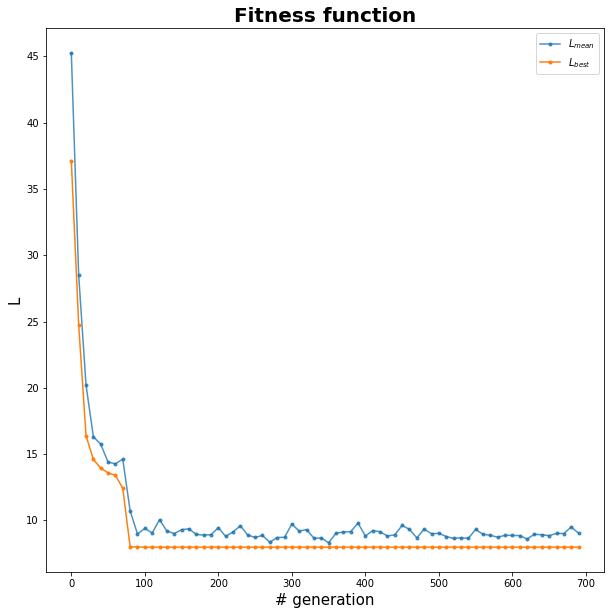

In [133]:
file=open('L_circle.dat')
gen,best_L, ave_L=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)

plt.figure(figsize=(10,10))
plt.plot(gen, ave_L, '.-', alpha=0.8,label=r'$L_{mean}$')
plt.plot(gen, best_L, '.-', label=r'$L_{best}$')
plt.title("Fitness function", fontsize=20, fontweight='bold')
plt.xlabel("# generation", fontsize=15)
plt.ylabel("L", fontsize=15)
plt.legend()
plt.show()

Anche qui valgono le stesse conclusioni tratte nel caso del quadrato